In [76]:
import pandas as pd

In [77]:
df=pd.read_csv("banklimpio.csv")
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'poutcome_unknown',
       'y_yes'],
      dtype='object')

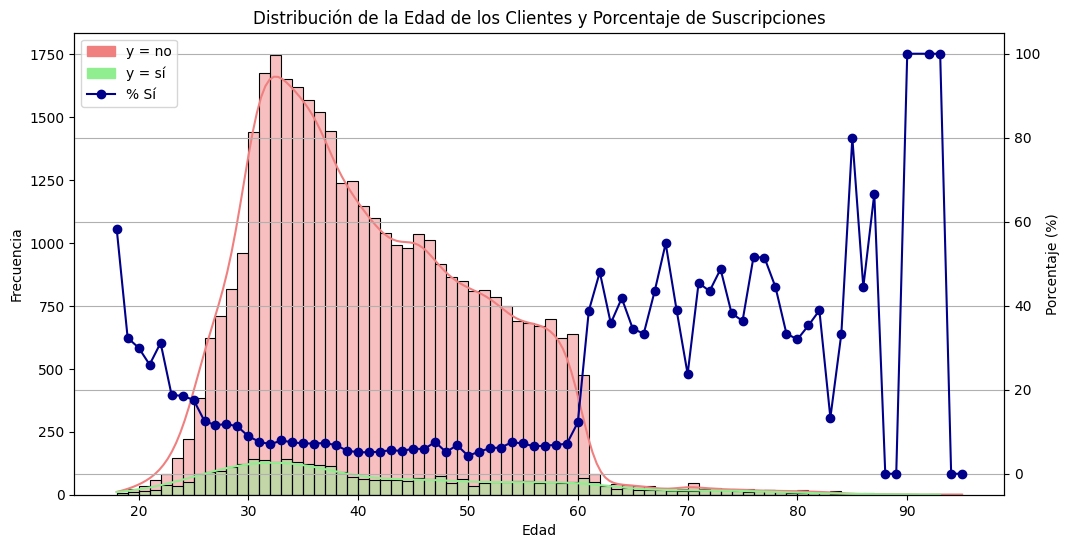

In [84]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los límites de los bins para que cada bin represente un año
age_bins = range(df['age'].min(), df['age'].max() + 1)

plt.figure(figsize=(12, 6))
# Histograma para 'y = no'
sns.histplot(df[df['y_yes'] == 0]['age'], bins=age_bins, color='lightcoral', edgecolor='black', kde=True)
# Histograma para 'y = sí'
sns.histplot(df[df['y_yes'] == 1]['age'], bins=age_bins, color='lightgreen', edgecolor='black', kde=True)

plt.xlabel('Edad')
plt.ylabel("Frecuencia")
plt.title('Distribución de la Edad de los Clientes y Porcentaje de Suscripciones')


# Calcular el porcentaje de "sí" para cada edad
age_counts = df.groupby('age')['y_yes'].agg(['sum', 'count'])
age_counts['percentage_yes'] = (age_counts['sum'] / age_counts['count']) * 100

# Añadir una línea para el porcentaje de "sí" sobre los histogramas
second_axis = plt.gca().twinx()  # Crear un segundo eje y
second_axis.plot(age_counts.index, age_counts['percentage_yes'], color='darkblue', marker='o', linestyle='-')
second_axis.set_ylabel('Porcentaje (%)')  # Etiqueta del eje derecho como "Porcentaje"


# Crear manejadores personalizados para las leyendas
legend_y_no = mpatches.Patch(color='lightcoral', label='y = no')
legend_y_yes = mpatches.Patch(color='lightgreen', label='y = sí')
legend_percentage = mlines.Line2D([], [], color='darkblue', marker='o', linestyle='-', label='% Sí')

# Colocar la leyenda personalizada en la esquina superior izquierda
plt.legend(handles=[legend_y_no, legend_y_yes, legend_percentage], loc='upper left')

# Ajustes finales
plt.grid(True)  # Activar cuadrícula
plt.show()






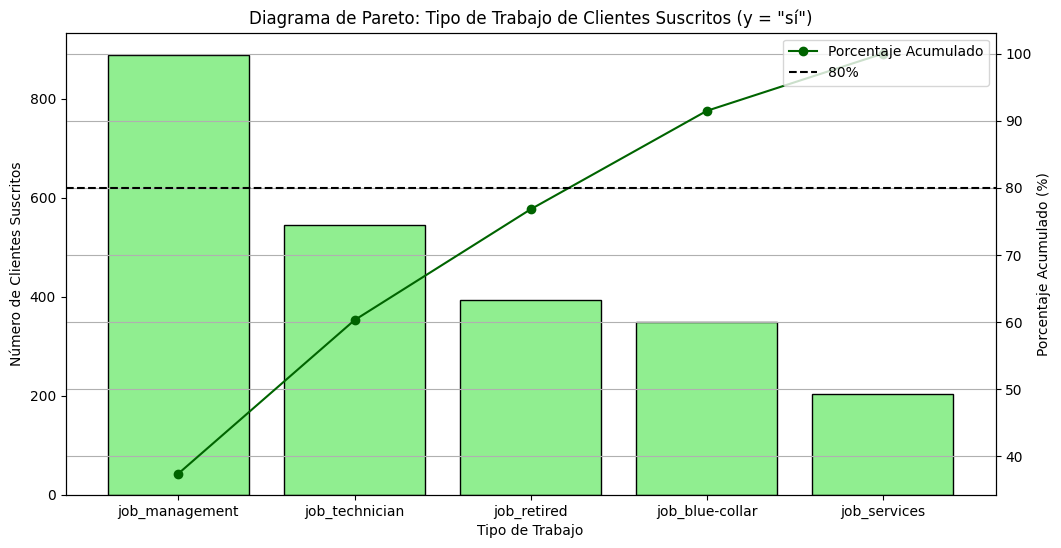

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 1].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightgreen', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes Suscritos (y = "sí")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkgreen', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


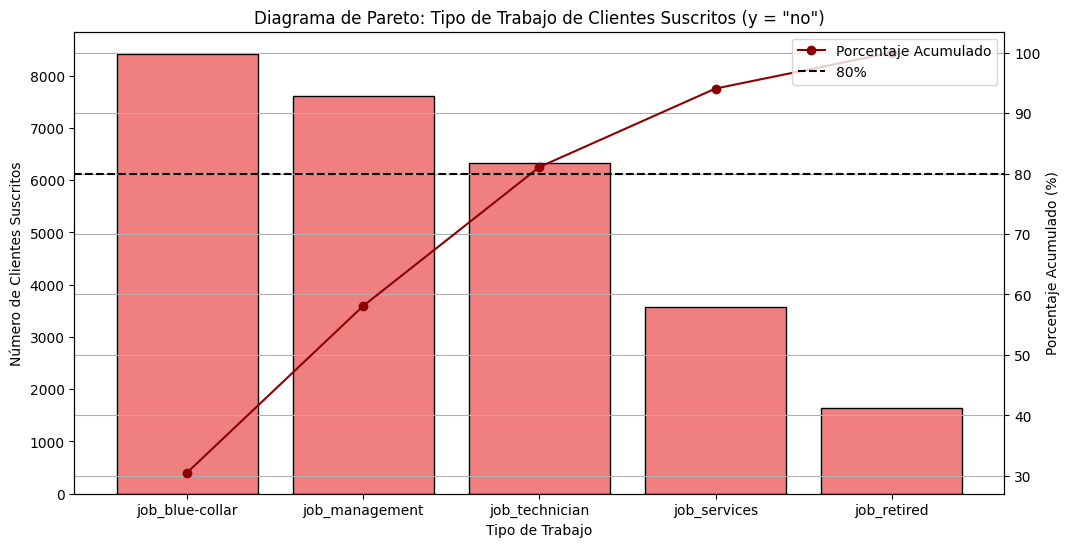

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los clientes suscritos y contar la cantidad de suscripciones por cada tipo de trabajo
job_counts = df[df['y_yes'] == 0].iloc[:, df.columns.str.startswith('job_')].sum()

# Ordenar los datos en orden descendente para el Pareto
job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

# Generar el gráfico de Pareto
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el conteo de cada tipo de trabajo
ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightcoral', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Diagrama de Pareto: Tipo de Trabajo de Clientes Suscritos (y = "no")')

# Agregar el porcentaje acumulado en el eje secundario
ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkred', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

# Añadir leyenda y mostrar el gráfico
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
